In [52]:
#load modules
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

from matplotlib import pyplot
import warnings

warnings.filterwarnings('ignore')

In [53]:
# fetch dataset 
thoracic_surgery_data = fetch_ucirepo(id=277) 
  
# description  of each feature abd check for missing values
print(thoracic_surgery_data.variables) 

       name     role         type demographic  \
0       DGN  Feature  Categorical        None   
1      PRE4  Feature   Continuous        None   
2      PRE5  Feature   Continuous        None   
3      PRE6  Feature  Categorical        None   
4      PRE7  Feature       Binary        None   
5      PRE8  Feature       Binary        None   
6      PRE9  Feature       Binary        None   
7     PRE10  Feature       Binary        None   
8     PRE11  Feature       Binary        None   
9     PRE14  Feature  Categorical        None   
10    PRE17  Feature       Binary        None   
11    PRE19  Feature       Binary        None   
12    PRE25  Feature       Binary        None   
13    PRE30  Feature       Binary        None   
14    PRE32  Feature       Binary        None   
15      AGE  Feature      Integer         Age   
16  Risk1Yr   Target       Binary        None   

                                          description units missing_values  
0   Diagnosis - specific combination of 

In [54]:
# data (as pandas dataframes) 
X = thoracic_surgery_data.data.features 
y = thoracic_surgery_data.data.targets 

In [55]:
le = LabelEncoder()
X['DGN'] = le.fit_transform(X['DGN'])

le1 = LabelEncoder()
X['PRE6'] = le1.fit_transform(X['PRE6'])

le2 = LabelEncoder()
X['PRE14'] = le2.fit_transform(X['PRE14'])

le3 = LabelEncoder()
X['PRE7'] = le3.fit_transform(X['PRE7'])

le4 = LabelEncoder()
X['PRE8'] = le4.fit_transform(X['PRE8'])

le5 = LabelEncoder()
X['PRE9'] = le5.fit_transform(X['PRE9'])

le6 = LabelEncoder()
X['PRE10'] = le6.fit_transform(X['PRE10'])

le7 = LabelEncoder()
X['PRE11'] = le6.fit_transform(X['PRE11'])

le8 = LabelEncoder()
X['PRE17'] = le8.fit_transform(X['PRE17'])

le9 = LabelEncoder()
X['PRE19'] = le9.fit_transform(X['PRE19'])

le10 = LabelEncoder()
X['PRE25'] = le10.fit_transform(X['PRE25'])

le11 = LabelEncoder()
X['PRE30'] = le11.fit_transform(X['PRE30'])

le12 = LabelEncoder()
X['PRE32'] = le11.fit_transform(X['PRE32'])

In [56]:
y.replace(['F', 'T'],[0, 1], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature 0: 1.475860
Feature 1: 0.765242
Feature 2: 1.883582
Feature 3: 1.900916
Feature 4: 0.397060
Feature 5: 3.224264
Feature 6: 1.152945
Feature 7: 2.643715
Feature 8: 4.019525
Feature 9: 4.809848
Feature 10: 7.885507
Feature 11: 0.156570
Feature 12: 0.909184
Feature 13: 1.151701
Feature 14: 0.314110
Feature 15: 3.771415


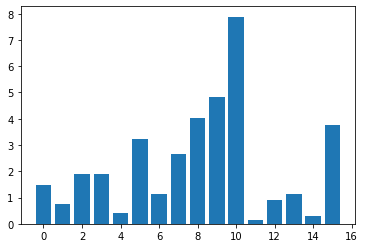

In [57]:
# feature selection - filter
##feature selection
def features_score(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    return fs

fs = features_score(X_train, y_train)

##show scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
##plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [58]:
# feature selection - filter
##base on the plot above, 8 features can be removed

##feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# learn relationship from training data
X_train_fs = fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [59]:
# Training logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [60]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test_fs)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        75
           1       0.00      0.00      0.00        19

    accuracy                           0.80        94
   macro avg       0.40      0.50      0.44        94
weighted avg       0.64      0.80      0.71        94



In [61]:
# feature selection - wrapper
from sklearn.feature_selection import RFECV
from numpy import array 

model_warpper = LogisticRegression()

# Use RFE to select the top 10 features
rfe = RFECV(model_warpper, step=1, cv=5)
rfe.fit(X, y)

RFECV(cv=5, estimator=LogisticRegression())

In [62]:
feature_names = array(thoracic_surgery_data.data.features.columns)

mask = rfe.get_support()
best_features = feature_names[mask]

print("Selected best: ", best_features.shape[0])
print(feature_names[mask]) 

Selected best:  1
['PRE9']


In [63]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [64]:
# Training logistic regression model
model_warpper = LogisticRegression(solver='liblinear')
model_warpper.fit(X_train_rfe, y_train)

LogisticRegression(solver='liblinear')

In [65]:
# Use the model to make predictions on the testing data
y_pred = model_warpper.predict(X_test_rfe)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        75
           1       0.00      0.00      0.00        19

    accuracy                           0.80        94
   macro avg       0.40      0.50      0.44        94
weighted avg       0.64      0.80      0.71        94



In [66]:
# feature selection - embedded

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [68]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [69]:
sel_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
sel_feats

Index(['DGN', 'PRE4', 'PRE5', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE25', 'PRE30', 'PRE32', 'AGE'],
      dtype='object')

In [70]:
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

In [71]:
# Training logistic regression model
model_emb = LogisticRegression(solver='liblinear')
model_emb.fit(X_train_selected, y_train)

LogisticRegression(solver='liblinear')

In [72]:
# Use the model to make predictions on the testing data
y_pred = model_emb.predict(X_test_selected)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        75
           1       0.00      0.00      0.00        19

    accuracy                           0.79        94
   macro avg       0.40      0.49      0.44        94
weighted avg       0.63      0.79      0.70        94



In [76]:
log = LogisticRegression(solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [78]:
y_pred = log.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        75
           1       0.00      0.00      0.00        19

    accuracy                           0.80        94
   macro avg       0.40      0.50      0.44        94
weighted avg       0.64      0.80      0.71        94

